In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import label, binary_fill_holes
from skimage.measure import perimeter

# packages needed for animation
import ffmpeg
from IPython.display import clear_output, display, HTML
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

In [3]:
# python imports
import numpy as np
import random
import os
import pickle

from mcf10amigration import *
from mcf10amigration.cpm_initializations import *
#from mcf10amigration.cpm import *
#from mcf10amigration.gillespie_step import *
#from mcf10amigration.hams import *
#from mcf10amigration.monte_carlo_step import *
#from mcf10amigration.visuals import *
from mcf10amigration.light import *


C:\Users\Kavya\AppData\Local\Temp\ipykernel_4856\190117416.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pastel_colors = plt.cm.get_cmap('Set3', num_colors+1)


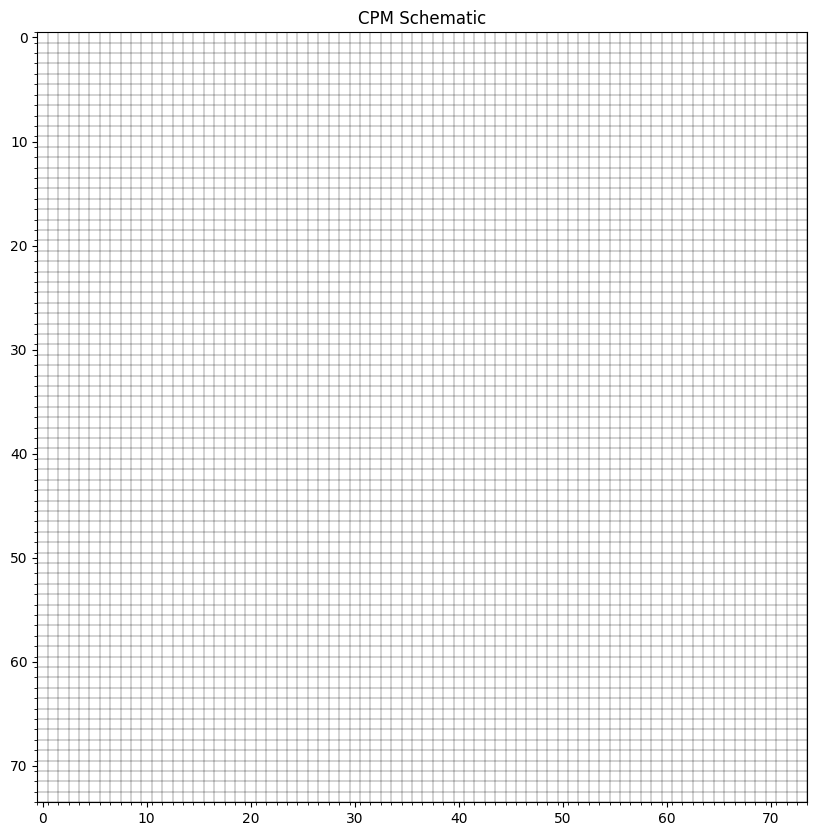

In [ ]:
#CPM schematic figure

target_area = 37 #49 #37
target_perimeter = 20.992 #20.992 #0.00

cpm = CPM(
    grid_size=74,  
    target_area=37, 
    initialization="tissue_sparse", 
    margin=10)

#adjust colormap to include white at first position

num_colors = np.max(cpm.grid)
pastel_colors = plt.cm.get_cmap('Set3', num_colors+1)
colormap = pastel_colors(np.linspace(0, 1, num_colors+1))
colormap[0, :] = [1, 1, 1, 1]  # set first values (0, background color) to be white
colormap = ListedColormap(colormap)

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cpm.grid, cmap=colormap, interpolation='nearest')

# cell ID text annotations
for x in range(cpm.grid_size):
    for y in range(cpm.grid_size):
        cell_id = cpm.grid[y, x]
        if cell_id != 0:  # Only annotate cells with IDs
            ax.text(x, y, str(cell_id), color='black', ha='center', va='center', fontsize=8)

ax.set_title("CPM Schematic")
ax.set_xticks(np.arange(-0.5, cpm.grid_size, 1), minor=True)
ax.set_yticks(np.arange(-0.5, cpm.grid_size, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.25)

plt.show()